In [1]:
import numpy as np
import fitsio
from astropy.table import Table, join
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sgafile = '/global/cfs/cdirs/cosmo/data/sga/2020/SGA-2020.fits'

In [3]:
fitsio.FITS(sgafile)[1]


  file: /global/cfs/cdirs/cosmo/data/sga/2020/SGA-2020.fits
  extension: 1
  type: BINARY_TBL
  extname: ELLIPSE
  rows: 383620
  column info:
    SGA_ID              i8  
    SGA_GALAXY         S16  
    GALAXY             S29  
    PGC                 i8  
    RA_LEDA             f8  
    DEC_LEDA            f8  
    MORPHTYPE          S21  
    PA_LEDA             f4  
    D25_LEDA            f4  
    BA_LEDA             f4  
    Z_LEDA              f4  
    SB_D25_LEDA         f4  
    MAG_LEDA            f4  
    BYHAND              b1  
    REF                S13  
    GROUP_ID            i8  
    GROUP_NAME         S35  
    GROUP_MULT          i2  
    GROUP_PRIMARY       b1  
    GROUP_RA            f8  
    GROUP_DEC           f8  
    GROUP_DIAMETER      f4  
    BRICKNAME           S8  
    RA                  f8  
    DEC                 f8  
    D26                 f4  
    D26_REF             S4  
    PA                  f4  
    BA                  f4  
    RA_MOMENT  

In [4]:
fitsio.FITS(sgafile)[2]


  file: /global/cfs/cdirs/cosmo/data/sga/2020/SGA-2020.fits
  extension: 2
  type: BINARY_TBL
  extname: TRACTOR
  rows: 383620
  column info:
    SGA_ID              i8  
    RELEASE             i2  
    BRICKID             i4  
    OBJID               i4  
    BRICK_PRIMARY       b1  
    MASKBITS            i2  
    ITERATIVE           b1  
    TYPE                S6  
    RA                  f8  
    DEC                 f8  
    RA_IVAR             f4  
    DEC_IVAR            f4  
    BX                  f4  
    BY                  f4  
    DCHISQ              f4  array[5]
    EBV                 f4  
    MJD_MIN             f8  
    MJD_MAX             f8  
    REF_CAT             S2  
    REF_ID              i8  
    PMRA                f4  
    PMDEC               f4  
    PARALLAX            f4  
    PMRA_IVAR           f4  
    PMDEC_IVAR          f4  
    PARALLAX_IVAR       f4  
    REF_EPOCH           f4  
    GAIA_POINTSOURCE
                        b1  
    GAIA_PHOT_G

In [5]:
t1 = Table(fitsio.read(sgafile, 'ELLIPSE', columns=['SGA_ID', 'GALAXY', 'PGC', 'RA', 'DEC', 'D26', 'D26_REF', 'SMA_MOMENT']))
t1                                                   

SGA_ID,GALAXY,PGC,RA,DEC,D26,D26_REF,SMA_MOMENT
int64,str29,int64,float64,float64,float32,str4,float32
2,PGC1283207,1283207,228.3770803831908,5.423191398593787,0.49470574,SB26,10.897086
3,PGC1310416,1310416,202.5444619671207,6.9346244322326624,0.55350494,SB26,15.746941
4,SDSSJ145059.93+135143.0,4435547,222.7497050504303,13.861929561160224,0.37067476,SB26,8.877115
7,PGC1742504,1742504,182.08882232629614,25.60226821438983,0.8883204,SB26,19.779116
18,2MASXJ12340801+4535444,3550748,188.53364923054596,45.595620212931856,0.73435897,SB26,15.694805
20,SDSSJ173412.71+572041.6,3331584,263.55294849855886,57.344862145664294,0.4460123,SB26,10.459747
24,PGC2162969,2162969,247.42445048371366,40.24820033835744,0.5431378,LEDA,15.888059
25,PGC054121,54121,227.47031353123606,13.256402782093659,0.9032927,SB26,23.756569
26,PGC2468893,2468893,163.5984039051307,54.41298240323229,0.3833318,SB26,8.821292


In [6]:
I = t1['SMA_MOMENT'] > 0.
xx = t1['D26'][I].value
yy = t1['SMA_MOMENT'][I].value / 60.
refs = t1['D26_REF'][I].value

SB25 4.1980257
SB26 2.6949368
LEDA 2.5626535


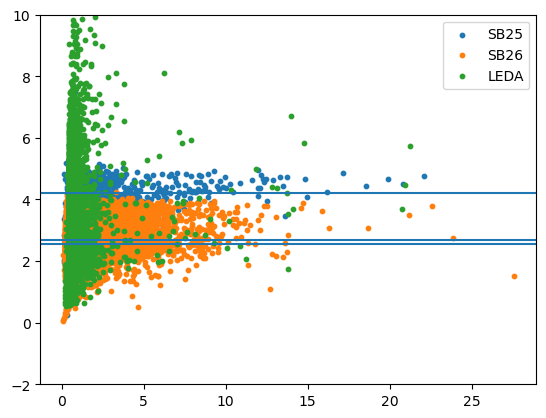

In [7]:
fig, ax = plt.subplots()
for ref in set(refs):
    I = ref == refs
    diam = xx[I]
    ratio = xx[I]/yy[I]
    med = np.median(ratio)
    ax.scatter(diam, ratio, s=10, label=ref)
    ax.axhline(y=med)
    print(ref, med)
#ax.set_xlim(0, 25)
ax.set_ylim(-2, 10)
ax.legend()

In [8]:
I = t1['D26_REF'] == 'SB25'
tt = t1[I]
ratio = tt['D26'].value / (tt['SMA_MOMENT'].value/60.)
J = np.argmin(np.abs(ratio - 4.198))
tt[J]

SGA_ID,GALAXY,PGC,RA,DEC,D26,D26_REF,SMA_MOMENT
int64,str29,int64,float64,float64,float32,str4,float32
176572,UGC11930,68195,332.4920481178379,20.933491647473954,2.8161805,SB25,40.25007


In [9]:
t3 = join(Table(fitsio.read(sgafile, 'TRACTOR', columns=['SGA_ID', 'RA', 'DEC', 'TYPE', 'SERSIC', 'SHAPE_R'])),
          Table(fitsio.read(sgafile, 'ELLIPSE', columns=['SGA_ID', 'GALAXY', 'D25_LEDA', 'D26', 'D26_REF', 'SMA_SB24',
                                                         'SMA_SB25', 'SMA_SB26', 'SMA_MOMENT'])))
I = ((t3['SMA_SB24'] > 0.) * (t3['SMA_SB25'] > 0.) * (t3['SMA_SB26'] > 0.) * 
     (t3['D26_REF'] == 'SB26') * (t3['SMA_MOMENT'] > 0.) * (t3['SMA_MOMENT']/60. < 1.) * (t3['D25_LEDA'] > 0.))
t3 = t3[I]
t3

SGA_ID,TYPE,RA,DEC,SERSIC,SHAPE_R,GALAXY,D25_LEDA,D26,D26_REF,SMA_MOMENT,SMA_SB24,SMA_SB25,SMA_SB26
int64,str6,float64,float64,float32,float32,str29,float32,float32,str4,float32,float32,float32,float32
2,SER,228.3770803831908,5.423191398593787,1.7235138,3.3263667,PGC1283207,0.36307806,0.49470574,SB26,10.897086,10.073601,12.391357,14.841172
3,SER,202.5444619671207,6.9346244322326624,1.9607356,8.432848,PGC1310416,0.4017908,0.55350494,SB26,15.746941,11.529764,14.115497,16.605148
4,SER,222.7497050504303,13.861929561160224,0.89465046,4.1346583,SDSSJ145059.93+135143.0,0.33342642,0.37067476,SB26,8.877115,7.242806,9.158723,11.120243
7,SER,182.08882232629614,25.60226821438983,5.0073137,9.239063,PGC1742504,0.548277,0.8883204,SB26,19.779116,16.323679,20.915508,26.649612
18,SER,188.53364923054596,45.595620212931856,4.5350695,4.7661753,2MASXJ12340801+4535444,0.53088444,0.73435897,SB26,15.694805,12.170589,16.722517,22.03077
20,SER,263.55294849855886,57.344862145664294,1.3540022,5.9521594,SDSSJ173412.71+572041.6,0.4487454,0.4460123,SB26,10.459747,8.426254,11.022999,13.380368
25,REX,227.47031353123606,13.256402782093659,0.0,9.335298,PGC054121,0.8165824,0.9032927,SB26,23.756569,18.73402,22.853401,27.098782
26,DEV,163.5984039051307,54.41298240323229,4.0,2.5205646,PGC2468893,0.35892195,0.3833318,SB26,8.821292,6.0306945,8.429446,11.499954
29,SER,168.12195030280432,60.24520943972748,4.100763,3.428083,2MASXJ11122927+6014431,0.37153524,0.5254904,SB26,10.063886,9.5116625,12.624502,15.764712


In [10]:
np.array([0.49470574, 0.36307806])*60./10.897086, 2.*3.3263667/10.897086

(array([2.72387906, 1.99912927]), 0.6105057260262056)

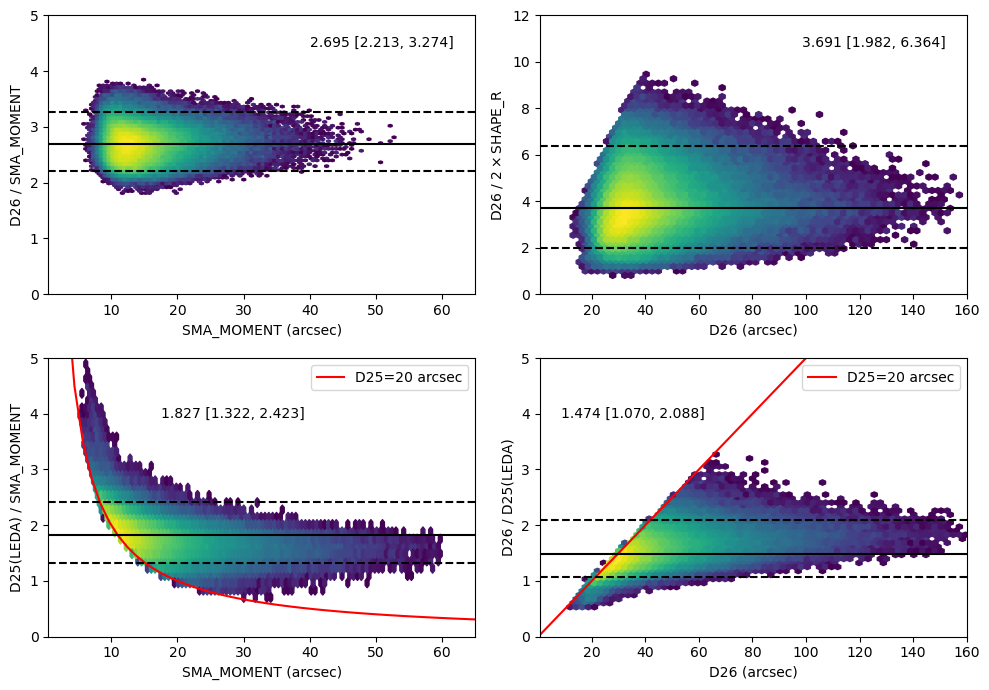

In [32]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 7))

xx = t3['SMA_MOMENT'].value
ratio = t3['D26'].value * 60. / xx
qlo, med, qhi = np.percentile(ratio, [5., 50., 95.])

ax1.hexbin(xx, ratio, mincnt=10, bins='log')
ax1.axhline(y=med, ls='-', color='k')
ax1.axhline(y=qlo, ls='--', color='k')
ax1.axhline(y=qhi, ls='--', color='k')
ax1.text(0.95, 0.9, f'{med:.3f} [{qlo:.3f}, {qhi:.3f}]', 
           transform=ax1.transAxes, va='center', ha='right')
ax1.set_ylabel('D26 / SMA_MOMENT')
ax1.set_ylim(0, 5)
ax1.set_xlim(0.5, 65.)
ax1.set_xlabel('SMA_MOMENT (arcsec)')

xx = t3['D26'].value * 60.
ratio = xx / (2. * t3['SHAPE_R'].value)
qlo, med, qhi = np.percentile(ratio, [5., 50., 95.])

ax2.hexbin(xx, ratio, mincnt=10, bins='log')
ax2.axhline(y=med, ls='-', color='k')
ax2.axhline(y=qlo, ls='--', color='k')
ax2.axhline(y=qhi, ls='--', color='k')
ax2.text(0.95, 0.9, f'{med:.3f} [{qlo:.3f}, {qhi:.3f}]', 
         transform=ax2.transAxes, va='center', ha='right')
ax2.set_ylabel(r'D26 / $2\times$SHAPE_R')
ax2.set_ylim(0, 12)
ax2.set_xlim(0.5, 160.)
ax2.set_xlabel('D26 (arcsec)')

xx = t3['SMA_MOMENT'].value
ratio = t3['D25_LEDA'].value * 60. / xx # [arcmin --> arcsec]
qlo, med, qhi = np.percentile(ratio, [5., 50., 95.])
xvals = np.linspace(0.5, 65., 50)

ax3.hexbin(xx, ratio, mincnt=10, bins='log')
ax3.plot(xvals, 20./xvals, color='red', label='D25=20 arcsec')
ax3.axhline(y=med, ls='-', color='k')
ax3.axhline(y=qlo, ls='--', color='k')
ax3.axhline(y=qhi, ls='--', color='k')
ax3.legend(loc='upper right')
ax3.text(0.6, 0.8, f'{med:.3f} [{qlo:.3f}, {qhi:.3f}]', 
         transform=ax3.transAxes, va='center', ha='right')
ax3.set_ylabel('D25(LEDA) / SMA_MOMENT')
ax3.set_ylim(0, 5)
ax3.set_xlim(0.5, 65.)
ax3.set_xlabel('SMA_MOMENT (arcsec)')


xx = t3['D26'].value * 60.
ratio = xx / (t3['D25_LEDA'].value * 60.)
qlo, med, qhi = np.percentile(ratio, [5., 50., 95.])
xvals = np.linspace(0.5, 160., 50)

ax4.hexbin(xx, ratio, mincnt=10, bins='log')
ax4.plot(xvals, xvals/20., color='red', label='D25=20 arcsec')
ax4.axhline(y=med, ls='-', color='k')
ax4.axhline(y=qlo, ls='--', color='k')
ax4.axhline(y=qhi, ls='--', color='k')
ax4.legend(loc='upper right')
ax4.text(0.05, 0.8, f'{med:.3f} [{qlo:.3f}, {qhi:.3f}]', 
         transform=ax4.transAxes, va='center', ha='left')
ax4.set_ylabel('D26 / D25(LEDA)')
ax4.set_ylim(0, 5)
ax4.set_xlim(0.5, 160.)
ax4.set_xlabel('D26 (arcsec)')

fig.tight_layout()